pyFFTW not found, using Numpy FT.


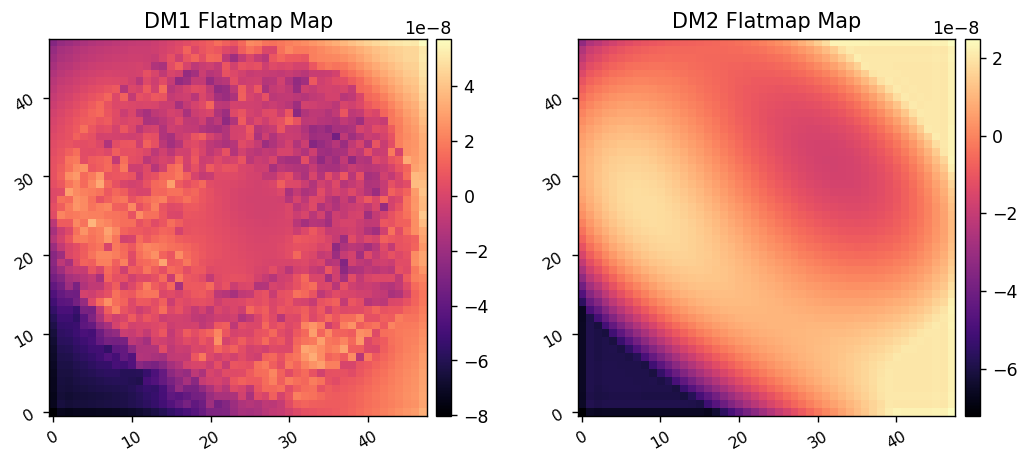

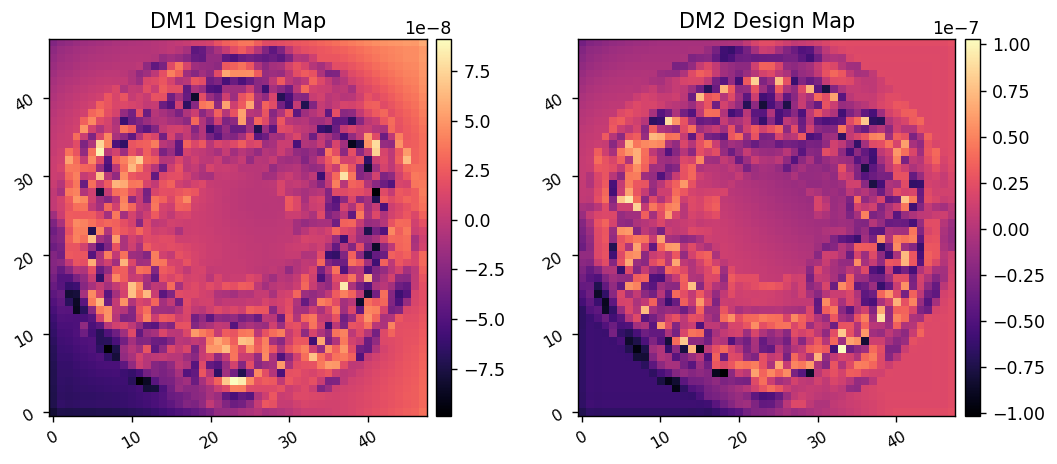

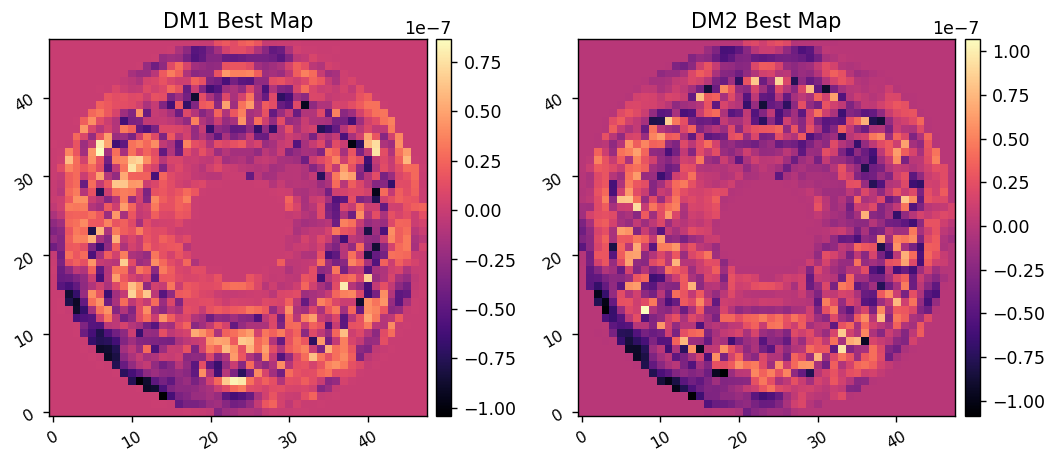

In [1]:
import numpy as np
from astropy.io import fits
import os
from pathlib import Path
import copy
import shutil
from importlib import reload

import matplotlib.pyplot as plt

import falco
import proper
proper.prop_use_fftw(DISABLE=True)

import misc

import falco_hlc_band1_setup_config as config
import falco_utils as fu
reload(config)
reload(fu)

misc.myimshow2(fu.dm1_flatmap, fu.dm2_flatmap, 'DM1 Flatmap Map', 'DM2 Flatmap Map')
misc.myimshow2(fu.dm1_total, fu.dm2_total, 'DM1 Design Map', 'DM2 Design Map')
misc.myimshow2(fu.dm1_best, fu.dm2_best, 'DM1 Best Map', 'DM2 Best Map')

# Setup the configuration

In [6]:
reload(config)
mp = config.setup(N_subpass=1, N_waves_per_subpass=1, fractional_bandwidth=0.01,
                  estimator='perfect', 
                  N_iterations=5,
                  spatial_weighting=[],
                  dark_hole_sides='r',
                  dm1_initial=fu.dm1_best, dm2_initial=fu.dm2_best,
                 )

/home/u21/kianmilani/src/pyfalco/falco/config


In [8]:
mp.runLabel = 'hlc_band1_best_' + mp.estimator + '_bw{:.2f}_'.format(mp.fracBW) \
              + mp.Fend.sides + '_{:d}itr'.format(mp.Nitr) + '_v1'
print(mp.runLabel)

hlc_band1_best_perfect_bw0.01_r_5itr_v1


Performing phase retrieval.

	Performing retrieval for sub-bandpass 1.
	Getting aberrations from full optical train.
	Using pinhole at FPM to get back-end aberrations.


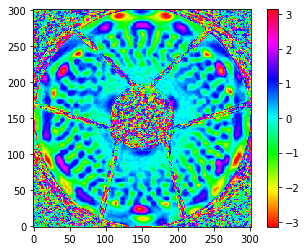

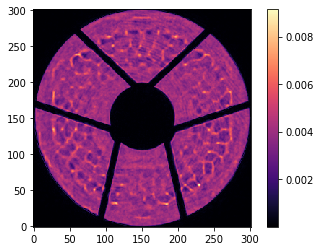

Phase retrieval complete.


In [7]:
config.perform_phase_retrieval(mp, quiet=True)

 Using 1 discrete wavelength(s) in each of 1 sub-bandpasses over a 1.0% total bandpass 

Sub-bandpasses are centered at wavelengths [nm]:	 [575.]


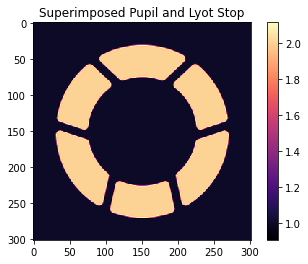

  Influence function padded from 84 to 84 points for A.S. propagation.
Computing datacube of DM influence functions... done.
  Influence function padded from 84 to 84 points for A.S. propagation.
Computing datacube of DM influence functions... done.


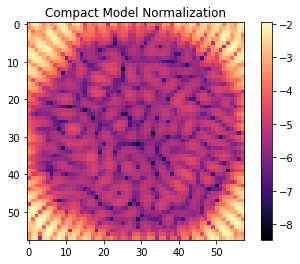

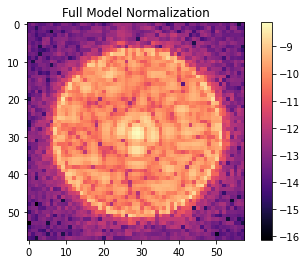


Beginning Trial 1 of Series 1.

DM 1-to-2 Fresnel number (using radius) = 932.0391304347827


In [9]:
# setup the workspace
out = falco.setup.flesh_out_workspace(mp)

In [14]:
modvar = falco.config.Object()  # Initialize the new structure
modvar.whichSource = 'star'
modvar.starIndex = 0
modvar.zernIndex = 1
modvar.sbpIndex = 0  # Dummy, placeholder value
modvar.wpsbpIndex = 0  # Dummy, placeholder value

In [15]:
Efull = falco.model.full(mp, modvar)

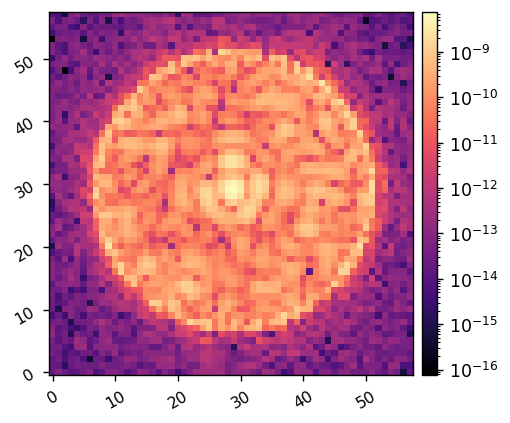

In [17]:
misc.myimshow(np.abs(Efull)**2, lognorm=True)

# Perform the Wavefront Sensing and Control

In [15]:
falco.wfsc.loop(mp, out)

fu.save_pickle(mp.runLabel, mp)

NameError: name 'out' is not defined

In [19]:
import run_falco_hlc_band1_config

/home/u21/kianmilani/src/pyfalco/falco/config
hlc_band1_best_perfect_bw0.01_r_10itr_v1
Performing phase retrieval.

	Performing retrieval for sub-bandpass 1.
	Getting aberrations from full optical train.


KeyboardInterrupt: 